In [1]:
import netket as nk
import jax
from netket.operator.spin import sigmax,sigmaz
from scipy.sparse.linalg import eigsh
import numpy as np
N = 10
hi = nk.hilbert.Spin(s=1 / 2, N=N)
Gamma = -1
H = sum([Gamma*sigmax(hi,i) for i in range(N)])
V=-1
H += sum([V*sigmaz(hi,i)*sigmaz(hi,(i+1)) for i in range(N-1)])

In [2]:
sp_h = H.to_sparse()
eig_vals, eig_vecs = eigsh(sp_h, k=1, which="SA")
print("eigenvalues with scipy sparse:", eig_vals)


eigenvalues with scipy sparse: [-12.38149]


In [8]:
 np.abs(eig_vecs.ravel()) ** 2

array([0.08608304, 0.02200967, 0.00868402, ..., 0.00868402, 0.02200967,
       0.08608304])

(1024,)

In [7]:
eig_vecs.shape

(1024, 1)

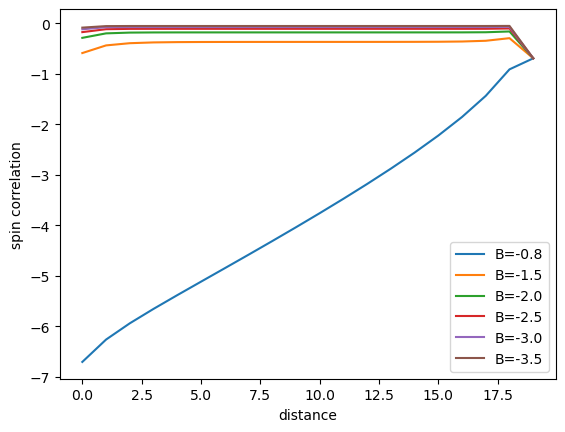

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import netket as nk
import jax
spin_corre_1 = np.load("spin_correlation_exact_L=20_B=-0.8.npy")
spin_corre_2 = np.load("spin_correlation_exact_L=20_B=-1.5.npy")
spin_corre_3 = np.load("spin_correlation_exact_L=20_B=-2.0.npy")
spin_corre_4 = np.load("spin_correlation_exact_L=20_B=-2.5.npy")
spin_corre_5 = np.load("spin_correlation_exact_L=20_B=-3.0.npy")
spin_corre_6 = np.load("spin_correlation_exact_L=20_B=-3.5.npy")
plt.plot(np.log(spin_corre_1),label="B=-0.8")
plt.plot(np.log(spin_corre_2),label="B=-1.5")
plt.plot(np.log(spin_corre_3),label="B=-2.0")
plt.plot(np.log(spin_corre_4),label="B=-2.5")
plt.plot(np.log(spin_corre_5),label="B=-3.0")
plt.plot(np.log(spin_corre_6),label="B=-3.5")
plt.xlabel("distance")
plt.ylabel("spin correlation")
plt.legend()
plt.show()